In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./clock_data.csv')
# df = pd.read_csv('./gru_auction/clock_data_gru.csv')
df.head()

,price_0,agent10,agent20,agent30,agent40,agent50,agent60,agent70,agent80,agent90,...,agent16170,agent17170,agent18170,agent19170,agent20170,agent21170,agent22170,agent23170,agent24170,agent25170
0,"[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.000...","[0.0, 0.0, 0.0, 0.0, 5.662999999999999, 5.6629...","[0.0, 0.0, 0.0, 0.0, 1.426, 1.426, 1.351999999...","[0.0, 0.0, 0.0, 0.0, 2.311, 2.311, 2.214, 2.08...","[0.0, 0.0, 0.0, 0.0, 15.150000000000002, 15.15...","[0.0, 0.0, 0.0, 0.0, 4.4959999999999996, 4.495...","[0.0, 0.0, 0.0, 0.0, 8.088, 8.088, 7.92, 7.75,...","[0.0, 0.0, 0.0, 0.0, 11.221, 11.221, 10.815000...","[0.0, 0.0, 0.0, 0.0, 10.255000000000003, 10.25...","[0.0, 0.0, 0.0, 0.0, 9.236000000000002, 9.2360...",...,"[0.0, 0.0, 0.0, 0.047, 0.047, 0.047, 0.047, 0....","[0.0, 0.0, 0.0, 0.081, 0.081, 0.081, 0.081, 0....","[0.0, 0.0, 0.0, 0.602, 0.602, 0.602, 0.602, 0....","[0.0, 0.0, 0.0, 0.35, 0.35, 0.35, 0.35, 0.203,...","[0.0, 0.0, 0.0, 0.105, 0.105, 0.105, 0.105, 0....","[0.0, 0.0, 0.0, 0.252, 0.252, 0.252, 0.252, 0....","[0.0, 0.0, 0.0, 1.009, 1.009, 1.009, 1.009, 0....","[0.0, 0.0, 0.0, 0.093, 0.093, 0.093, 0.093, 0....","[0.0, 0.0, 0.0, 0.74, 0.74, 0.74, 0.74, 0.624,...","[0.0, 0.0, 0.0, 0.129, 0.129, 0.129, 0.129, 0...."
2,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.364, 0.0, 0.0, 0.0, 5.662999999999999, 0.0,...","[0.026, 0.0, 0.0, 0.0, 1.426, 0.0, 0.0, 0.0, 0...","[0.153, 0.0, 0.0, 0.0, 2.311, 0.0, 0.0, 0.0, 0...","[0.091, 0.0, 0.0, 0.0, 15.150000000000002, 0.0...","[0.168, 0.0, 0.0, 0.0, 4.4959999999999996, 0.0...","[0.171, 0.0, 0.0, 0.0, 8.088, 0.0, 0.0, 0.0, 0...","[0.322, 0.0, 0.0, 0.0, 11.221, 0.0, 0.0, 0.0, ...","[0.415, 0.0, 0.0, 0.0, 10.255000000000003, 0.0...","[0.236, 0.0, 0.0, 0.0, 9.236000000000002, 0.0,...",...,"[0.045, 0.0, 0.0, 0.047, 0.0, 0.0, 0.0, 0.218,...","[0.085, 0.0, 0.0, 0.081, 0.0, 0.0, 0.0, 0.124,...","[0.312, 0.0, 0.0, 0.602, 0.0, 0.0, 0.0, 0.452,...","[0.047, 0.0, 0.0, 0.35, 0.0, 0.0, 0.0, 0.203, ...","[0.028, 0.0, 0.0, 0.105, 0.0, 0.0, 0.0, 0.097,...","[0.093, 0.0, 0.0, 0.252, 0.0, 0.0, 0.0, 0.26, ...","[0.642, 0.0, 0.0, 1.009, 0.0, 0.0, 0.0, 0.441,...","[0.088, 0.0, 0.0, 0.093, 0.0, 0.0, 0.0, 0.43, ...","[0.089, 0.0, 0.0, 0.74, 0.0, 0.0, 0.0, 0.624, ...","[1.144, 0.0, 0.0, 0.129, 0.0, 0.0, 0.0, 0.396,..."
3,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.0, 0.364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.228, 0...","[0.0, 0.026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.074, 0...","[0.0, 0.153, 0.0, 0.0, 0.0, 0.0, 0.0, 0.097, 0...","[0.0, 0.091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.616, 1...","[0.0, 0.168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.387, 0...","[0.0, 0.171, 0.0, 0.0, 0.0, 0.0, 0.0, 0.168, 0...","[0.0, 0.322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.406, 0...","[0.0, 0.415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.373, 0...","[0.0, 0.236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.681, 0...",...,"[0.0, 0.045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.312, 0.0, 0.0, 0.0, 0.0, 0.0

## Preprocessing

In [4]:
df.columns

Index(['price_0', 'agent10', 'agent20', 'agent30', 'agent40', 'agent50',
       'agent60', 'agent70', 'agent80', 'agent90',
       ...
       'agent16170', 'agent17170', 'agent18170', 'agent19170', 'agent20170',
       'agent21170', 'agent22170', 'agent23170', 'agent24170', 'agent25170'],
      dtype='object', length=4184)

Num of agents = 25 \
Num of rounds = 309

In [21]:
df.price_0.iloc[0]

'[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]'

In [6]:
df.agent10.iloc[0]

'[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]'

Deserealizing price strings to arrays of dim (1, 24) that represent Prices for 24 hour time slots.

In [7]:
def deserialize_price(price):
    price_arr = []
    for p in price.split('\n')[:24]:
        price_arr.append(float(p.split()[1]))

    return np.array(price_arr, dtype=float)


ptrn = re.compile(r'price')
for col in df.columns:
    if ptrn.match(col):
        df[col] = df[col].apply(deserialize_price)

ValueError: could not convert string to float: '0.2,'

In [7]:
df.price_0[0]

array([0.294, 0.294, 0.294, 0.294, 0.294, 0.294, 0.294, 0.294, 0.29 ,
       0.29 , 0.29 , 0.29 , 0.29 , 0.29 , 0.29 , 0.29 , 0.29 , 0.294,
       0.294, 0.294, 0.294, 0.294, 0.294, 0.294])

Deserealizing demand strings to arrays of dim (1, 24) that represent Demands for 24 hour time slots.

In [8]:
ptrn = re.compile(r'agent')
for col in df.columns:
    if ptrn.match(col):
        df[col] = df[col].apply(lambda x: np.array(x.strip('][').split(), dtype=float))

In [22]:
np.save(arr=df.columns.values, file='./clock_data_columns.npy')
np.save(arr=df.values, file='./clock_data_values.npy', )

In [10]:
df.to_csv('./preprocessed_clock_data.csv', index=False)

## Data Analysis

1. Can we please confirm for every user and every round of the auction, that the total amount of charge they put in is always equal to the total amount of discharge they demand?

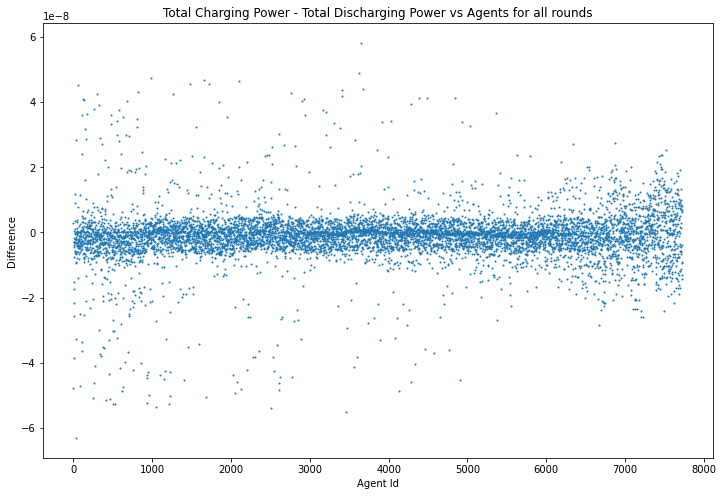

In [20]:
delta = []

for r in range(309):
    for i in range(1, 26):
        col = f'agent{i}{r}'

        total_cha = np.sum(df[col][2])
        total_dis = np.sum(df[col][3])

        delta.append(total_cha - total_dis)

plt.figure(figsize=(12, 8))

plt.scatter(x=range(len(delta)), y=delta, s=1)
plt.xlabel('Agent Id')
plt.ylabel('Difference')
plt.title('Total Charging Power - Total Discharging Power vs Agents for all rounds')

plt.show()


2. Can we confirm that at no point in time does any user, no matter what round of the auction, draw more charge than they have previously put in?

In [30]:
flag_overdis = []
flag_residual = []

df_diff = pd.DataFrame(columns=list(range(309)))

for r in range(309):
    for i in range(1, 26):
        col = f'agent{i}{r}'
        diff = df[col][2] - df[col][3]

        df_diff.at[i, r] = diff

        sum = 0

        for t in range(24):
            sum += diff[t]
            if sum < 0:
                flag_overdis.append((r, i, t, sum))

        if sum > 0:
            flag_residual.append((r, i, sum))

df_diff.to_csv('diff_vectors.csv')

1. flag_overdis -> (Round number, Agent id, Time Slot, Overdischarge Amount)
2. flag_residual -> (Round number, Agent id, Residual Charge Amount)
3. diff_vectors -> (Column index = Agent id, Row index = Agent id, value = Difference vector)

3. Let us find out, for each user and each round, a 24 dimensional vector that calculates the sum of the PV demand and the Dis demand

In [46]:
df_net_demand = pd.DataFrame(columns=list(range(309)))

for r in range(309):
    for i in range(1, 26):
        col = f'agent{i}{r}'
        
        pv = df[col][0]
        dis = df[col][3]

        df_net_demand.at[i, r] = pv + dis

df_net_demand.to_csv('net_demand_vectors.csv')

net_demand_vectors -> (Column index = Round number, Row index = Agent id, value = net demand vector) \
net_demand = PV Energy + Discharging Power Demand \
net_demand is hourly.

In [52]:
df_net_demand.head()

,0,1,2,3,4,5,6,7,8,9,...,299,300,301,302,303,304,305,306,307,308
1,"[0.478999984, 3.87296265e-10, 0.0, 0.0, 0.0, 0...","[0.479000009630469, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.47900000981758284, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.4790000084817864, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4789999831912456, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.47899999801498466, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.4789999952388226, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.478998942, 4.70048047e-07, 1.69832334e-07, ...","[0.47899999837726104, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.4790000098382385, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84445401e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444858e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[0.01200000981067013, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.012000009814191021, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.01200000981758283, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.01200000982085084, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0119996098, 1.55297887e-07, 8.02353066e-08,...","[0.011999994512396, 0.0, 0.0, 0.0, 0.0, 0.0, 8...","[0.011999984878243901, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.01200000983283017, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0120000098355788, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.01200000983823611, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[9.84444551e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444551e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444551e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444551e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444551e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84454779e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.02806359e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84445116e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444924e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84448135e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[0.143999967, 1.18208509e-08, 1.44700266e-09, ...","[0.143999951, 1.8993534e-08, 5.34899954e-09, 2...","[0.14400000981758285, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.1440000098208387, 5.79575901e-11, 0.0, 0.0,...","[0.143999968, 4.91032904e-09, 0.0, 0.0, 0.0, 0...","[0.14400000982703448, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.143995229, 1.60892073e-06, 8.83167823e-07, ...","[0.1439999969461325, 9.71846763e-10, 0.0, 0.0,...","[0.14399998353730464, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.14400000983728584, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444554e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.8444929e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84920958e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84480445e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444552e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84452525e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[0.19800000973803034, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.19799999610383337, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.197999862, 6.27266394e-08, 2.88391038e-08, ...","[0.19800000982085078, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.19799999573334656, 9.26608265e-10, 0.0, 0.0...","[0.19800000982704763, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.198000009829939, 9.01160715e-12, 0.0, 0.0, ...","[0.19800000983283017, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.19800000983557878, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.19799999719433833, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[9.84765382e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.1035734e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.84498471e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84498472e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84694028e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.2614650

In [57]:
def plot(a, t):

    x = [df_net_demand[r][a][t] for r in range(309)]

    plt.figure(figsize=(12, 8))

    plt.plot(x)
    plt.show()

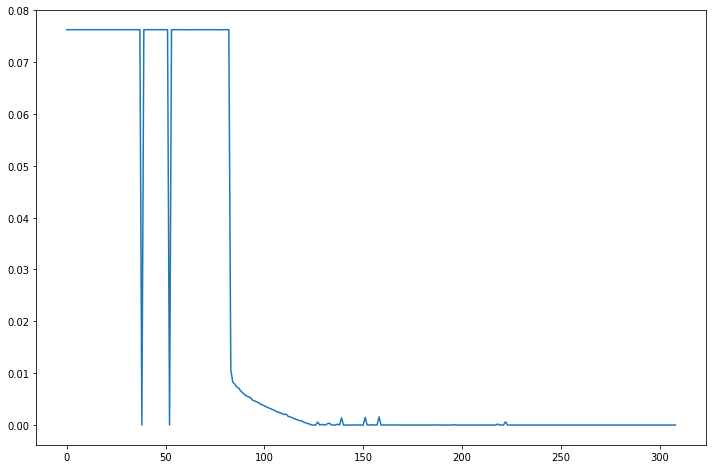

In [70]:
plot(10, 15)

Demand vs Time (Net demand for a resource throughout the day / round)

In [358]:
def plot_net_demand_time(r, agents=list(range(1, 26))):
    '''
    r = Round number
    agents = Agents to calculate net demand, default = All
    '''
    Res_0 = np.zeros(shape=(24, ), dtype=float)
    Res_1 = np.zeros(shape=(24, ), dtype=float)
    Res_2 = np.zeros(shape=(24, ), dtype=float)
    Res_3 = np.zeros(shape=(24, ), dtype=float)

    for col in [f'agent{i}{r}' for i in agents]:
        Res_0 += df[col][0]
        Res_1 += df[col][1]
        Res_2 += df[col][2]
        Res_3 += df[col][3]

    plt.figure(figsize=(9,6))
    plt.plot(Res_0, label='PV Energy')
    plt.plot(Res_1, label='Battery Capacity')
    plt.plot(Res_2, label='Battery Charging Power')
    plt.plot(Res_3, label='Battery Discharging Power')

    plt.xlabel('Time')
    plt.ylabel('Total Demand')
    plt.title(f'Total Demand of a resource vs Time for Round/Day {r}')

    plt.legend()
    plt.show()

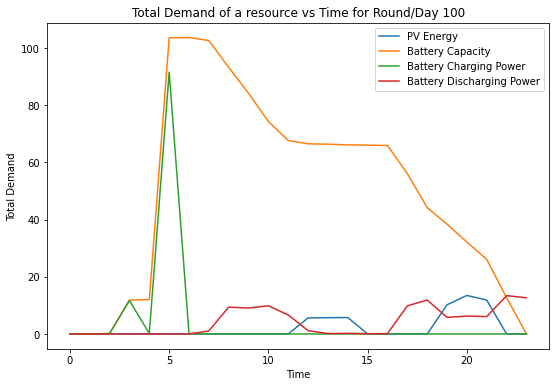

In [361]:
plot_net_demand_time(100)

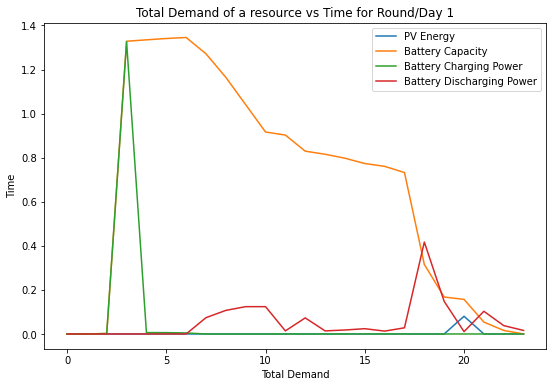

In [296]:
plot_net_demand_time(1, [24])

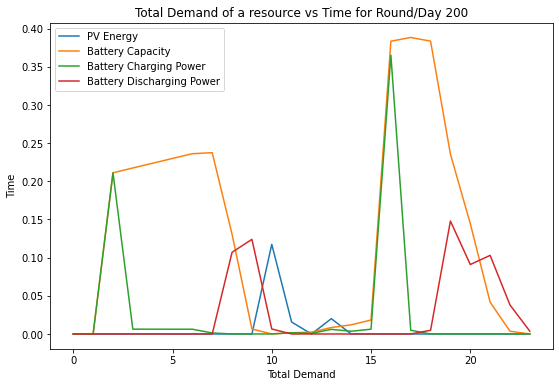

In [176]:
plot_net_demand_time(200, [2])

Peak Deamand for all Agents

In [253]:
def plot_peak_demand_agent(r):
    '''
    r = Round number
    '''
    Res_0 = np.zeros(shape=(25, ), dtype=float)
    Res_1 = np.zeros(shape=(25, ), dtype=float)
    Res_2 = np.zeros(shape=(25, ), dtype=float)
    Res_3 = np.zeros(shape=(25, ), dtype=float)

    agents = list(range(1, 26))

    for i in range(25):
        col = f'agent{i+1}{r}'

        Res_0[i] = np.max(df[col][0])
        Res_1[i] = np.max(df[col][1])
        Res_2[i] = np.max(df[col][2])
        Res_3[i] = np.max(df[col][3])

    plt.figure(figsize=(9,6))
    plt.plot(agents, Res_0, label='PV Energy')
    plt.plot(agents, Res_1, label='Battery Capacity')
    plt.plot(agents, Res_2, label='Battery Charging Power')
    plt.plot(agents, Res_3, label='Battery Discharging Power')

    plt.xlabel('Peak Demand')
    plt.ylabel('Agents')
    plt.title(f'Peak Demand of a resource vs Agent for Round/Day {r}')

    plt.legend()
    plt.show()

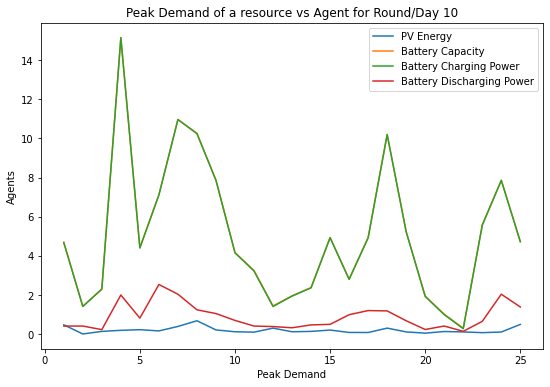

In [389]:
plot_peak_demand_agent(1)

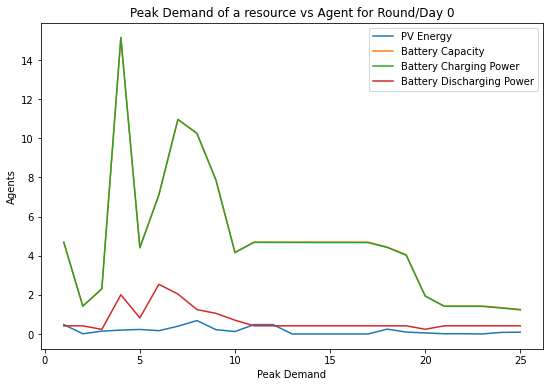

In [185]:
plot_peak_demand_agent(0)

Price vs Time

In [250]:
def plot_price_time(r):
    '''
    r = Round number
    '''
    Res_0 = np.zeros(shape=(24, ), dtype=float)
    Res_1 = np.zeros(shape=(24, ), dtype=float)
    Res_2 = np.zeros(shape=(24, ), dtype=float)
    Res_3 = np.zeros(shape=(24, ), dtype=float)

    col = f'price_{r}'
    Res_0 = df[col][0]
    Res_1 = df[col][1]
    Res_2 = df[col][2]
    Res_3 = df[col][3]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.suptitle(f'Price of a resource vs Time for Round/Day {r}')

    ax1.plot(Res_0, label='PV Energy')
    ax2.plot(Res_1, label='Battery Capacity')
    ax2.plot(Res_2, label='Battery Charging Power')
    ax2.plot(Res_3, label='Battery Discharging Power')

    ax1.set_ylabel('Price')
    ax2.set_ylabel('Price')
    ax1.set_xlabel('Time')
    ax2.set_xlabel('Time')

    ax1.legend()
    ax2.legend()

    fig.tight_layout()

    plt.show()

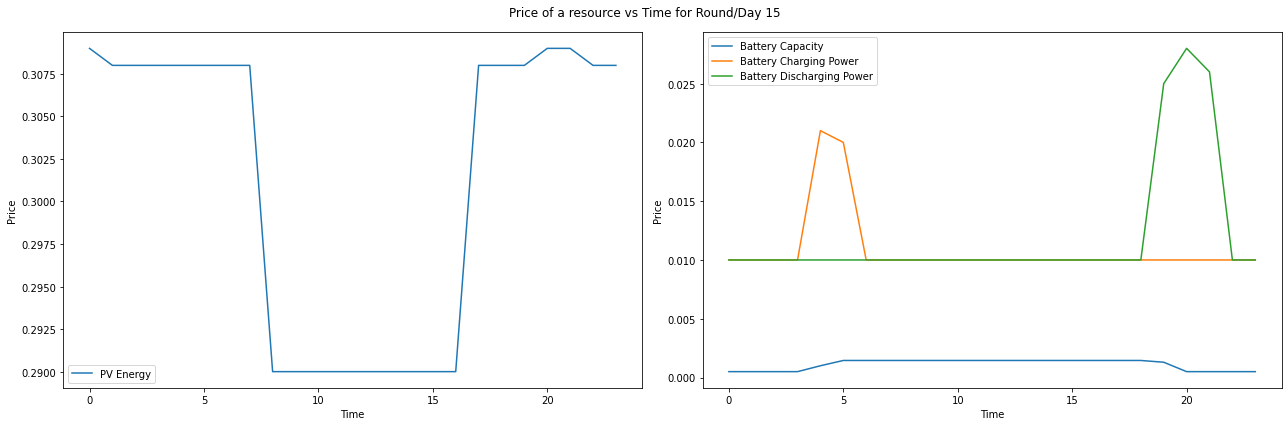

In [283]:
plot_price_time(15)

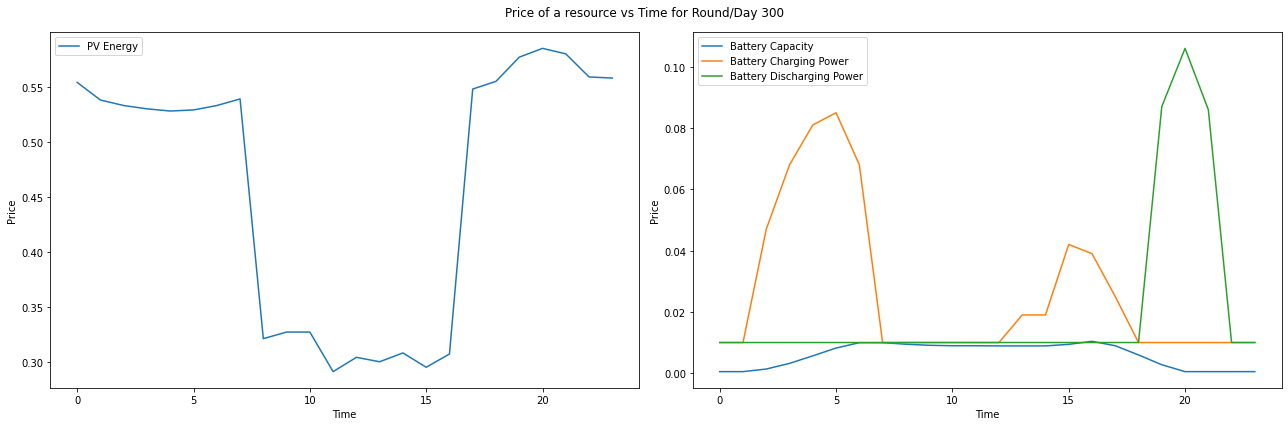

In [356]:
plot_price_time(300)

Price vs Days

In [280]:
def plot_price_round(t):
    '''
    t = Time slot
    '''
    Res_0 = np.zeros(shape=(309, ), dtype=float)
    Res_1 = np.zeros(shape=(309, ), dtype=float)
    Res_2 = np.zeros(shape=(309, ), dtype=float)
    Res_3 = np.zeros(shape=(309, ), dtype=float)

    for r in range(309):
        col = f'price_{r}'
        
        Res_0[r] = df[col][0][t]
        Res_1[r] = df[col][1][t]
        Res_2[r] = df[col][2][t]
        Res_3[r] = df[col][3][t]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.suptitle(f'Price of a resource vs Day/Round for Time slot {t}')

    ax1.plot(Res_0, label='PV Energy')
    ax2.plot(Res_1, label='Battery Capacity')
    ax2.plot(Res_2, label='Battery Charging Power')
    ax2.plot(Res_3, label='Battery Discharging Power')

    ax1.set_ylabel('Price')
    ax2.set_ylabel('Price')
    ax1.set_xlabel('Day/Round')
    ax2.set_xlabel('Day/Round')

    ax1.legend()
    ax2.legend()

    fig.tight_layout()

    plt.show()

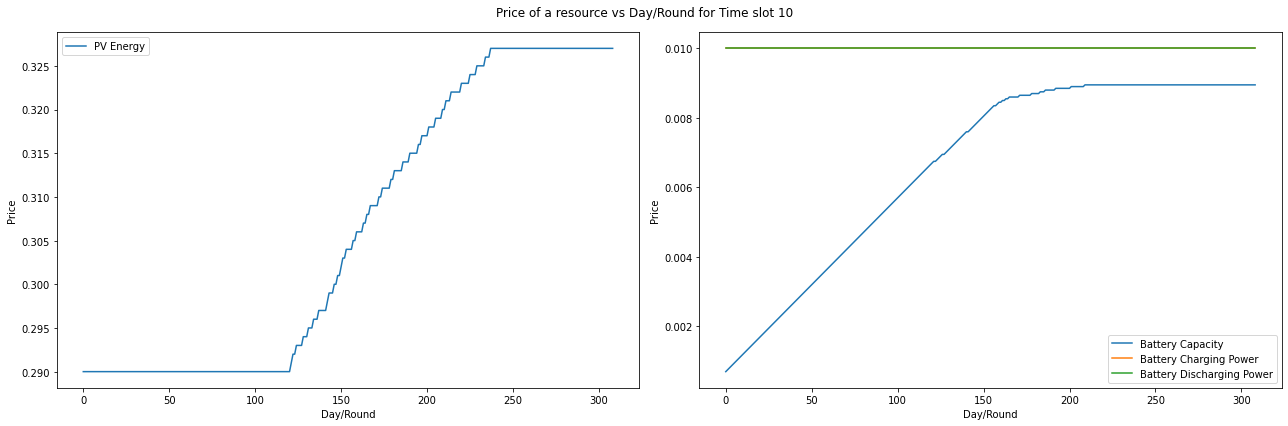

In [285]:
plot_price_round(10)

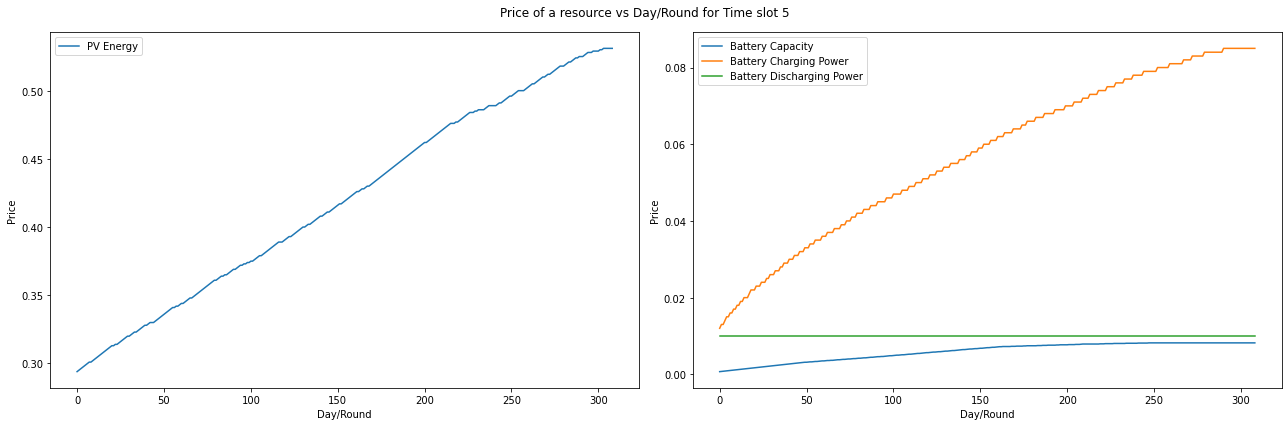

In [282]:
plot_price_round(5)

Demand vs Days

In [276]:
def plot_net_demand_round(t):
    '''
    t = Time slot
    '''
    Res_0 = np.zeros(shape=(309, ), dtype=float)
    Res_1 = np.zeros(shape=(309, ), dtype=float)
    Res_2 = np.zeros(shape=(309, ), dtype=float)
    Res_3 = np.zeros(shape=(309, ), dtype=float)

    for r in range(309):
        for i in range(1, 26):
            col = f'agent{i}{r}'
            
            Res_0[r] += df[col][0][t]
            Res_1[r] += df[col][1][t]
            Res_2[r] += df[col][2][t]
            Res_3[r] += df[col][3][t]

    plt.figure(figsize=(12, 8))
    plt.plot(Res_0, label='PV Energy')
    plt.plot(Res_1, label='Battery Capacity')
    plt.plot(Res_2, label='Battery Charging Power')
    plt.plot(Res_3, label='Battery Discharging Power')

    plt.xlabel('Total Demand')
    plt.ylabel('Day/Round')
    plt.title(f'Total Demand of a resource vs Round/Day for Time Slot {t}')

    plt.legend()
    plt.show()

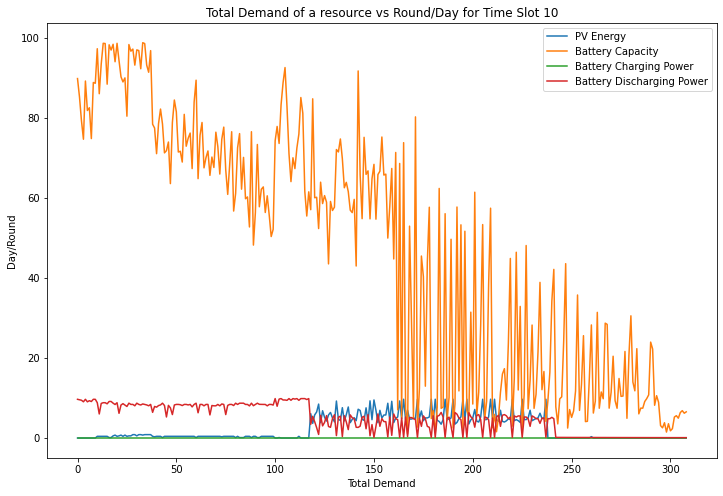

In [277]:
plot_net_demand_round(10)

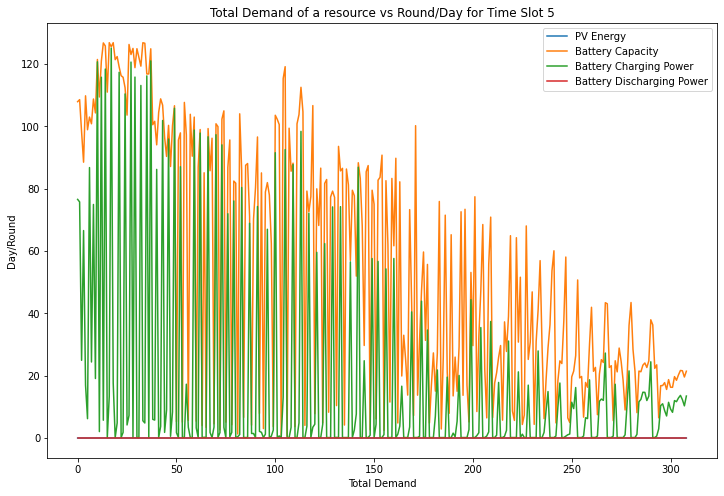

In [278]:
plot_net_demand_round(5)

In [301]:
df.head()

,Unnamed: 0,price_0,agent10,agent20,agent30,agent40,agent50,agent60,agent70,agent80,...,agent16308,agent17308,agent18308,agent19308,agent20308,agent21308,agent22308,agent23308,agent24308,agent25308
0,pv energy,"[0.294, 0.294, 0.294, 0.294, 0.294, 0.294, 0.2...","[0.478999984, 3.87296265e-10, 0.0, 0.0, 0.0, 0...","[0.012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.143999967, 1.18208509e-08, 1.44700266e-09, ...","[0.198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.231, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.167989864, 6.64264657e-06, 3.48053605e-06, ...","[0.396, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.072...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.084...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,battery capacity,"[0.0005, 0.0005, 0.0005, 0.0005, 0.0006, 0.000...","[2.74403334e-10, 1.33083483e-09, 5.01277792e-0...","[-9.81067013e-09, -9.79115224e-09, -8.81444199...","[1.18061477e-08, 1.28772292e-08, 7.86139633e-0...","[-9.73803033e-09, -9.71098552e-09, -8.3321723e...","[-8.92445168e-09, -8.81317291e-09, -3.25900339...","[6.56324107e-06, 7.26724526e-06, 4.12884047e-0...","[-9.81057924e-09, -9.79167182e-09, -8.84118961...","[-9.81067563e-09, -9.79110804e-09, -8.81375623...",...,"[-9.84407936e-09, 0.00215252642, 0.00858990396...","[-9.84459912e-09, 0.00211607904, 0.490310994, ...","[-9.84498471e-09, 0.00206228085, 0.00838885685...","[-9.84498471e-09, 0.00206229906, 0.00838887514...","[-9.84444614e-09, 0.0021160792, 0.107308191, 0...","[-9.84498471e-09, 0.00206229904, 0.00838887512...","[-9.84498471e-09, 0.00206229902, 0.0083888747,...","[-9.84449295e-09, 0.00211135807, 0.00849786321...","[-9.84498471e-09, 0.00206229904, 0.00838887513...","[-9.8444929e-09, 0.00211135805, 0.00849787483,..."
2,battery charging power,"[0.01, 0.01, 0.01, 0.01, 0.013, 0.012, 0.01, 0...","[2.74403334e-10, 1.05643149e-09, 4.87969443e-0...","[0.0, 1.95178837e-11, 9.76710258e-10, 0.002922...","[1.18061477e-08, 1.07108143e-09, 6.57367341e-0...","[0.0, 2.70448091e-11, 1.37881322e-09, 0.002970...","[0.0, 1.11278774e-10, 5.55416951e-09, 0.002922...","[6.56324107e-06, 7.04004187e-07, 3.40211595e-0...","[0.0, 1.89074151e-11, 9.5048221e-10, 0.0029227...","[0.0, 1.95675814e-11, 9.77351819e-10, 0.002922...",...,"[0.0, 0.00215254, 0.00643738, 0.00640003, 0.00...","[0.0, 0.00211609, 0.48819491, 0.00636419, 0.00...","[0.0, 0.00206229, 0.00632658, 0.0063116, 0.006...","[0.0, 0.00206231, 0.00632658, 0.00631173, 0.00...","[0.0, 0.00211609, 0.10519211, 0.00636419, 0.00...","[0.0, 0.00206231, 0.00632658, 0.00631173, 0.00...","[0.0, 0.00206231, 0.00632658, 0.00631173, 0.00...","[0.0, 0.00211137, 0.00638651, 0.00635956, 0.96...","[0.0, 0.00206231, 0.00632658, 0.00631173, 0.00...","[0.0, 0.00211137, 0.00638652, 0.00635956, 0.97..."
3,battery discharging power,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00096589, 0.2...","[9.81067013e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00096588, 0.0...","[9.73803033e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...","[8.92445168e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000965503264,...","[9.81057924e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...","[9.81067563e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...",...,"[9.84407936e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84459912e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84498471e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84498471e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.84444614e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[9.844984

In [317]:
def plot_price_demand(agent):
    '''
    t = Time slot
    '''
    Res_0 = []
    Res_1 = []
    Res_2 = []
    Res_3 = []

    demand_0 = []
    demand_1 = []
    demand_2 = []
    demand_3 = []

    for r in range(309):
        col = f'price_{r}'
        
        Res_0 = np.append(Res_0, df[col][0])
        Res_1 = np.append(Res_1, df[col][1])
        Res_2 = np.append(Res_2, df[col][2])
        Res_3 = np.append(Res_3, df[col][3])

        col2 = f'agent{agent}{r}'

        demand_0 = np.append(demand_0, df[col2][0])
        demand_1 = np.append(demand_1, df[col2][1])
        demand_2 = np.append(demand_2, df[col2][2])
        demand_3 = np.append(demand_3, df[col2][3])

    idx_0 = np.argsort(Res_0)
    idx_1 = np.argsort(Res_1)
    idx_2 = np.argsort(Res_2)
    idx_3 = np.argsort(Res_3)

    plt.figure(figsize=(12, 8))
    plt.scatter(Res_0[idx_0], demand_0[idx_0], label='PV Energy')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.scatter(Res_1[idx_1], demand_1[idx_1], label='Battery Capacity')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.scatter(Res_2[idx_2], demand_2[idx_2], label='Battery Charging Power')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.scatter(Res_3[idx_3], demand_3[idx_3], label='Battery Discharging Power')
    plt.show()

    # plt.xlabel('Price')
    # plt.ylabel('Demand')
    # plt.title(f'Demand vs Price for agent {agent}')

    plt.legend()
    plt.show()

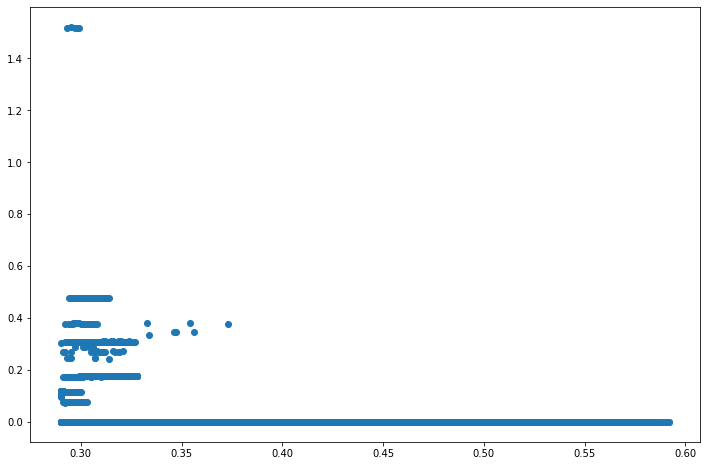

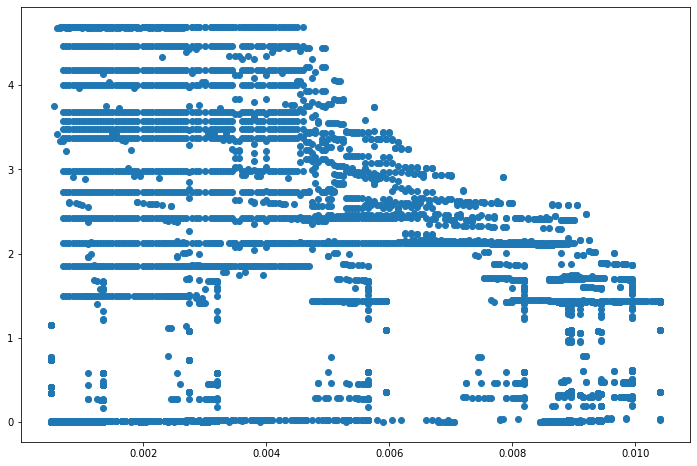

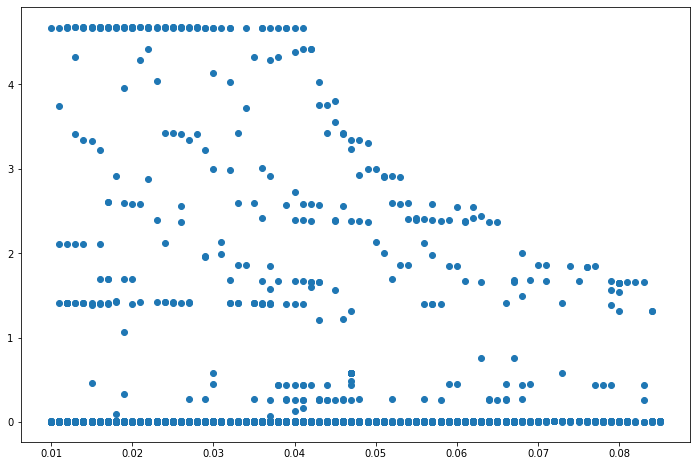

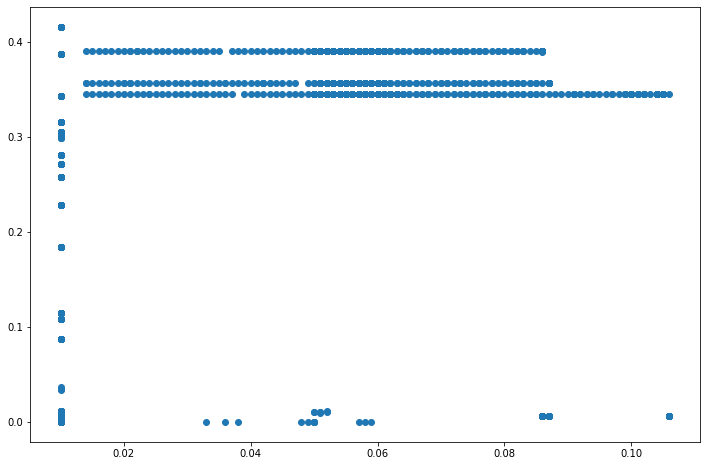

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


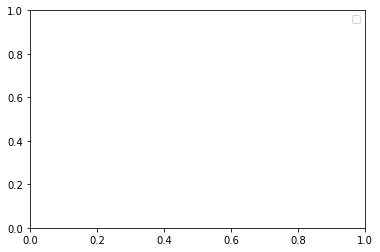

In [318]:
plot_price_demand(1)


In [390]:
def plot_price_demand_timewise(agent, time_slots = []):
    plt.figure(figsize=(12, 8))
    fig_PV = plt.gca()
    
    plt.figure(figsize=(12, 8))
    fig_Cap = plt.gca()

    plt.figure(figsize=(12, 8))
    fig_Char = plt.gca()

    plt.figure(figsize=(12, 8))
    fig_Dischar = plt.gca()

    for t in time_slots:
        Res_0 = [[]]
        Res_1 = [[]]
        Res_2 = [[]]
        Res_3 = [[]]

        demand_0 = [[]]
        demand_1 = [[]]
        demand_2 = [[]]
        demand_3 = [[]]

        for r in range(309):
            col = f'price_{r}'
            
            Res_0 = np.append(Res_0, df[col][0][t])
            Res_1 = np.append(Res_1, df[col][1][t])
            Res_2 = np.append(Res_2, df[col][2][t])
            Res_3 = np.append(Res_3, df[col][3][t])

            col2 = f'agent{agent}{r}'

            demand_0 = np.append(demand_0, df[col2][0][t])
            demand_1 = np.append(demand_1, df[col2][1][t])
            demand_2 = np.append(demand_2, df[col2][2][t])
            demand_3 = np.append(demand_3, df[col2][3][t])

        fig_PV.plot(Res_0, demand_0, label=f'time = {t}')
        fig_Cap.plot(Res_1, demand_1, label=f'time = {t}')
        fig_Char.plot(Res_2, demand_2, label=f'time = {t}')
        fig_Dischar.plot(Res_3, demand_3, label=f'time = {t}')

    # plt.xlabel('Price')
    # plt.ylabel('Demand')
    # plt.title(f'Demand vs Price for agent {agent}')

    fig_PV.set_title('PV Energy')
    fig_Cap.set_title('Battery Capacity')
    fig_Char.set_title('Battery Charging Power')
    fig_Dischar.set_title('Battery Discharging Power')

    fig_PV.set_ylim([0, 2])
    fig_Cap.set_ylim([0, 2])
    fig_Char.set_ylim([0, 2])
    fig_Dischar.set_ylim([0, 2])

    fig_PV.legend()
    fig_Cap.legend()
    fig_Char.legend()
    fig_Dischar.legend()
    
    plt.show()

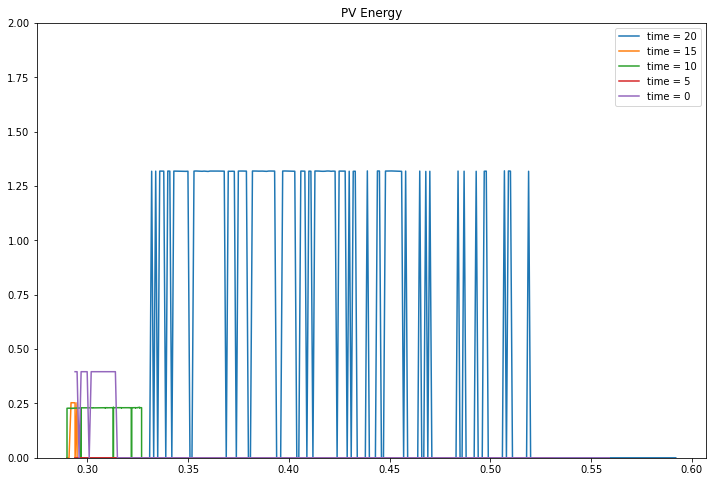

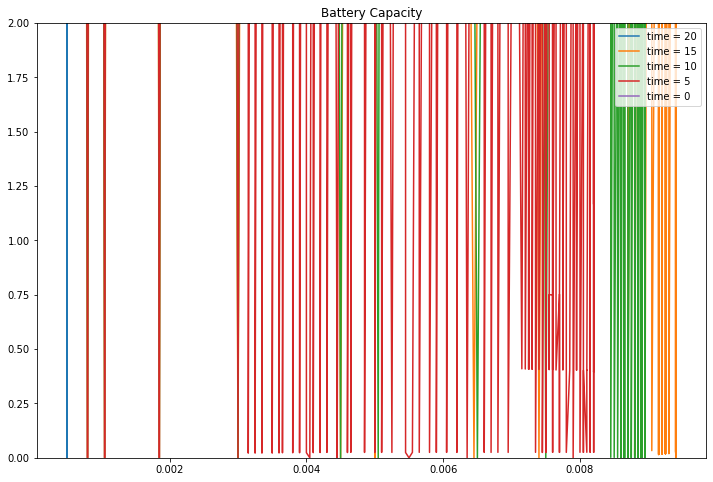

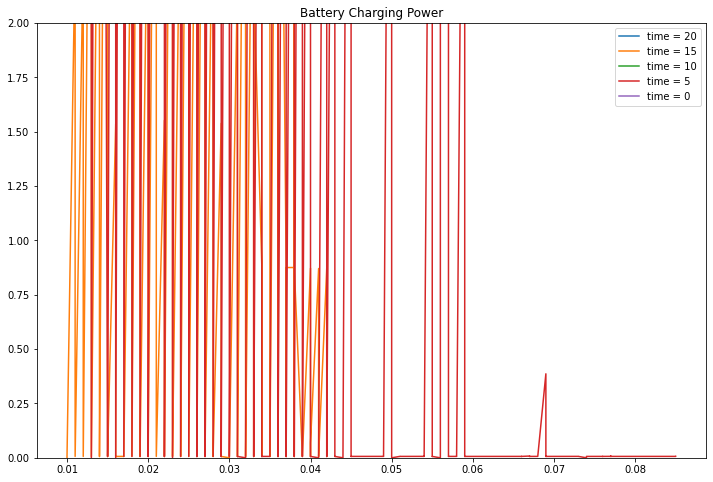

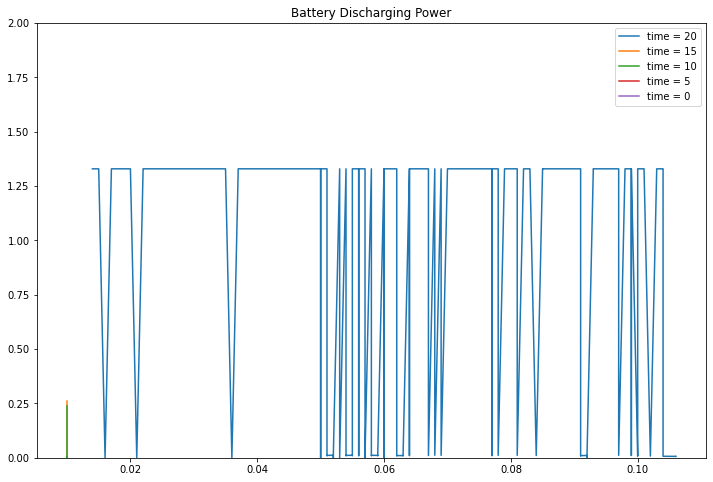

In [411]:
plot_price_demand_timewise(7, time_slots=[20, 15, 10, 5, 0])

In [330]:
arr = [[1, 2]]
arr = np.append(arr, [[1, 2]], axis=0)
arr = np.append(arr, [[4, 5]], axis=0)
arr

array([[1, 2],
       [1, 2],
       [4, 5]])

In [334]:
arr = [[]]
arr = np.append(arr, [[1, 2]], axis=1)
arr = np.append(arr, [[4, 5]], axis=0)
arr

array([[1., 2.],
       [4., 5.]])